# Red por transmisión con incidencia oblicua

[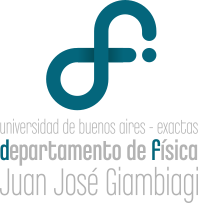](www.df.uba.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

![](figuras/redIncidencia.png) 

Para que cada punto de las rendijas emita en fase se lo puede iluminar con un frente de ondas plano.
Es sencillo de *fabricar* uno con una fuente puntual ubicada en el foco de una lente.

Pero si se desplaza la fuente del eje óptica la fase no será la misma en cada punto de las rendijas pues hay una diferencia de camino geométrico que recorre cada rayo que arriba a estos en función del ángulo de incidencia sobre la red.

De igual manera que se calculó anteriormente el excedente de camino que tiene \\(r\\) respecto a \\(R\\) se puede obtener que ahora
\\[
r \simeq R - x' ( \sin(\theta) - \sin(\theta_i) ).
\\]

Se puede mostrar que la expresión de la irradiancia es la misma que para incidencia normal del frente de onda plano sobre la red
\\[
I(x) \simeq I_0 \frac{ \sin^2( \frac{\gamma}{2} N ) }{ \sin^2( \frac{\gamma}{2} ) } \mathrm{sinc}^2 \left( \beta \right),
\\]
con la salvedad de un término extra en el \\(\beta\\) del término de difracción:
\\[
    \beta = \frac{2 \pi}{\lambda_0} \frac{b}{2} ( n \sin(\theta) - n_i \sin(\theta_i) ),
\\]
donde se contempla la posibilidad que el medio entre la lente y la red tenga un índice de refracción \\(n_i\\) distinto al del medio entre la red y la pantalla \\(n\\). 
De manera similar, en el término de interferencia
\\[
    \gamma = \frac{2\ \pi}{\lambda_0} d ( n \sin(\theta) - n_i \sin(\theta_i) ).
\\]

## Graficación de la distribución de intensidad sobre la pantalla

In [1]:
import numpy as np # biblioteca de cálculo numérico

In [2]:
# Iluminación
I_0 = 100* 1E2**2 # [W m-2]
n_p = 1 # del medio en la pantalla
n_i = 1 # del medio entre lente y red
theta_i = 0

# E0 = np.sqrt(2* I_0/ (constants.epsilon_0* constants.c* n_p) ) # [V m-1]
lambda_0_blau = 400E-9 # [m] azul
# lambda_0_blau = 656.5E-9 # [m] azul
lambda_0_violete = 380E-9 # [m] violeta
# lambda_0_rot = 750E-9 # [m] rojo
colorMap = 'Blues'

In [3]:
def interferenciaN(n_p, n_i, theta_i, lambda_0, d, N, sinsTheta):
    '''
    sinsTheta : senos de los ángulos con que incide en un x' en la pantalla
    '''
    gamma = (2* np.pi/ lambda_0)* d* (n_p* sinsTheta - n_i* np.sin(theta_i) )
    return (np.sin(gamma* N/2)/ np.sin(gamma/2) )**2

def difraccion1(n_p, n_i, theta_i, lambda_0, b, sinsTheta):
    beta = (2* np.pi/ lambda_0)* (b/2)* (n_p* sinsTheta - n_i* np.sin(theta_i) )
    return (np.sin(beta)/ beta)**2

In [4]:
# Parámetros de red de rendijas
N = 10 # número de rendijas
b = 50E-6 # [m]
d = 100E-6 # [m]

# Parametros del sistema de observación
D = 2 # [m] distancia red a pantalla
x_semi = 6E-2 # [m] semi-ancho de la pantalla de observación

In [5]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
## Graficación convencional
sinExtremoPantalla = x_semi/np.sqrt(x_semi**2 + D**2) # [m]
puntos = np.int(1E3)
sinsTheta = np.linspace(-sinExtremoPantalla, sinExtremoPantalla, num = puntos)
xPrimaPantalla = D* np.tan(np.arcsin( sinsTheta ) )  # [m] posiciones en la pantalla

In [7]:
# Calculo de irradiancia en cada punto
interferencia_blau = interferenciaN(n_p, n_i, theta_i, lambda_0_blau, d, N, sinsTheta)
interferencia_violete = interferenciaN(n_p, n_i, theta_i, lambda_0_violete, d, N, sinsTheta)
# interferencia_rot = interferenciaN(n_p, n_i, theta_i, lambda_0_rot, d, N, sinsTheta)
difraccion_blau = difraccion1(n_p, n_i, theta_i, lambda_0_blau, b, sinsTheta)
difraccion_violete = difraccion1(n_p, n_i, theta_i, lambda_0_violete, b, sinsTheta)
# difraccion_rot = difraccion1(n_p, n_i, theta_i, lambda_0_rot, b, sinsTheta)

Text(0.5, 1.0, 'La difracción modula la interferencia')

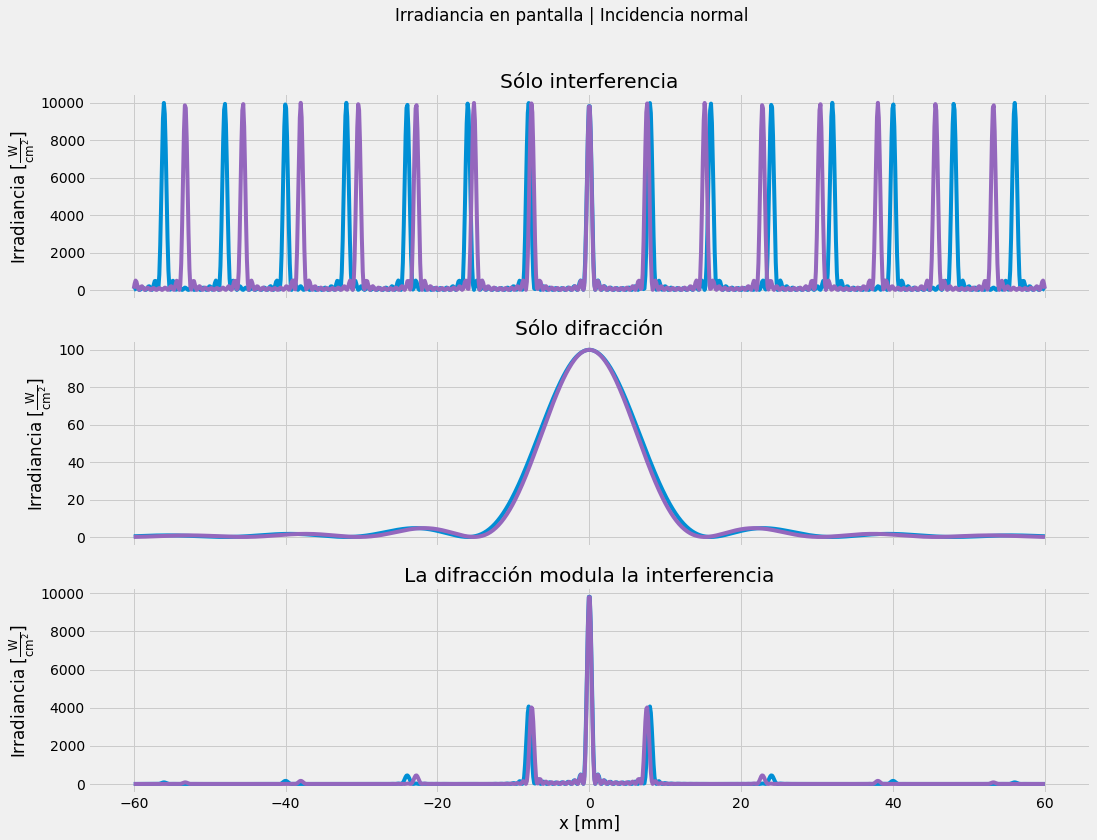

In [8]:
# posición en pantalla
fig, ax = plt.subplots(3,1,figsize=(16,12), sharex=True)
fig.suptitle('Irradiancia en pantalla | Incidencia normal')

I_interferencia_blau = interferencia_blau * I_0* 1E-2**2 # [W cm^-2]
ax[0].plot(xPrimaPantalla * 1e3, I_interferencia_blau)
I_interferencia_violete = interferencia_violete * I_0* 1E-2**2 # [W cm^-2]
ax[0].plot(xPrimaPantalla * 1e3, I_interferencia_violete, 'tab:purple')
# I_interferencia_rot = interferencia_rot * I_0* 1E-2**2 # [W cm^-2]
# ax[0].plot(xPrimaPantalla * 1e3, I_interferencia_rot, 'tab:red')
ax[0].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[0].set_title('Sólo interferencia')

I_difraccion_blau = difraccion_blau* I_0* 1E-2**2 # [W cm^-2]
ax[1].plot(xPrimaPantalla * 1e3, I_difraccion_blau)
I_difraccion_violete = difraccion_violete* I_0* 1E-2**2 # [W cm^-2]
ax[1].plot(xPrimaPantalla * 1e3, I_difraccion_violete, 'tab:purple')
# I_difraccion_rot = difraccion_rot* I_0* 1E-2**2 # [W cm^-2]
# ax[1].plot(xPrimaPantalla * 1e3, I_difraccion_rot, 'tab:red')
ax[1].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[1].set_title('Sólo difracción')

I_blau = interferencia_blau* difraccion_blau* I_0* 1E-2**2 # [W cm^-2]
ax[2].plot(xPrimaPantalla * 1e3, I_blau )
I_violete = interferencia_violete* difraccion_violete* I_0* 1E-2**2 # [W cm^-2]
ax[2].plot(xPrimaPantalla * 1e3, I_violete, 'tab:purple' )
# I_rot = interferencia_rot* difraccion_rot* I_0* 1E-2**2 # [W cm^-2]
# ax[2].plot(xPrimaPantalla * 1e3, I_rot, 'tab:red' )
ax[2].set_xlabel('x [mm]')
ax[2].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[2].set_title('La difracción modula la interferencia')

## ¿Probamos con otro ángulo de incidencia para intensificar en otro lugar?
Por ejemplo \\(\theta = 1.1^\circ\\) intensificará donde estaba el \\(M =5\\).

In [9]:
theta_i = 1.1 * np.pi/180.0

In [10]:
# Calculo de irradiancia en cada punto
interferencia_blau = interferenciaN(n_p, n_i, theta_i, lambda_0_blau, d, N, sinsTheta)
interferencia_violete = interferenciaN(n_p, n_i, theta_i, lambda_0_violete, d, N, sinsTheta)
difraccion_blau = difraccion1(n_p, n_i, theta_i, lambda_0_blau, b, sinsTheta)
difraccion_violete = difraccion1(n_p, n_i, theta_i, lambda_0_violete, b, sinsTheta)

Text(0.5, 1.0, 'La difracción modula la interferencia')

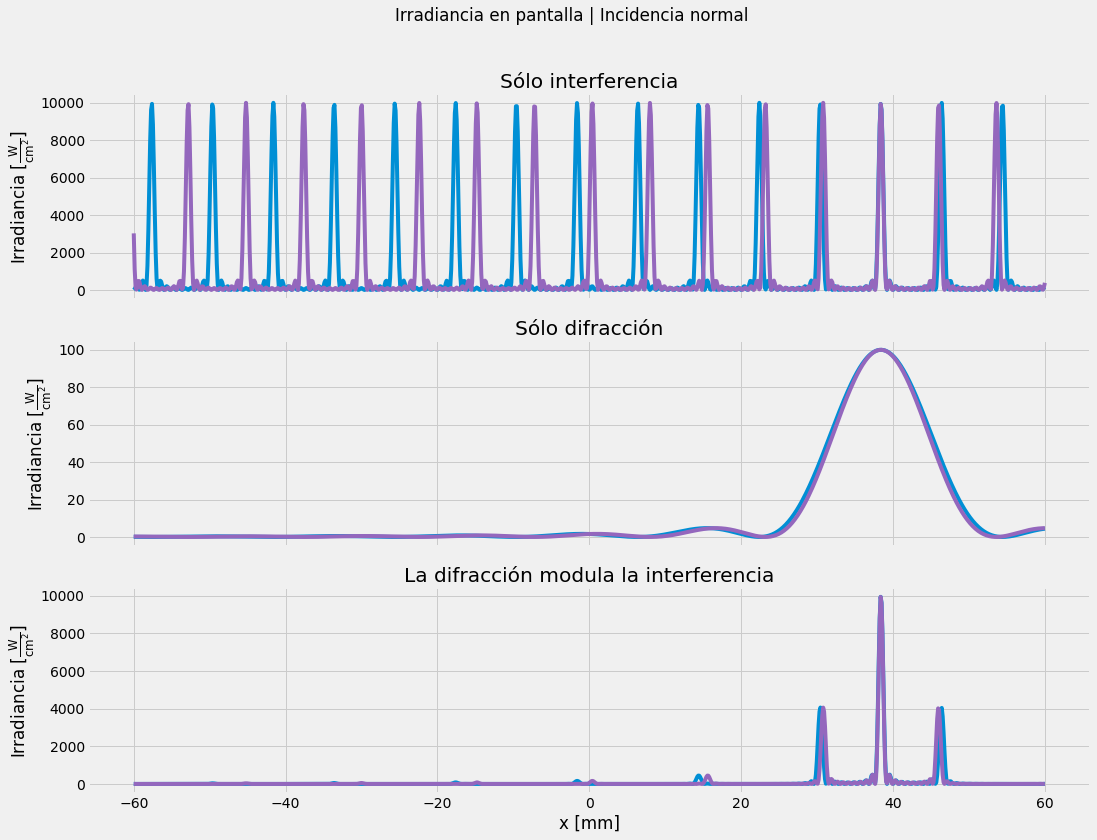

In [11]:
# posición en pantalla
fig, ax = plt.subplots(3,1,figsize=(16,12), sharex=True)
fig.suptitle('Irradiancia en pantalla | Incidencia normal')
I_interferencia_blau = interferencia_blau * I_0* 1E-2**2 # [W cm^-2]
ax[0].plot(xPrimaPantalla * 1e3, I_interferencia_blau)
I_interferencia_violete = interferencia_violete * I_0* 1E-2**2 # [W cm^-2]
ax[0].plot(xPrimaPantalla * 1e3, I_interferencia_violete, 'tab:purple')
ax[0].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[0].set_title('Sólo interferencia')

I_difraccion_blau = difraccion_blau* I_0* 1E-2**2 # [W cm^-2]
ax[1].plot(xPrimaPantalla * 1e3, I_difraccion_blau)
I_difraccion_violete = difraccion_violete* I_0* 1E-2**2 # [W cm^-2]
ax[1].plot(xPrimaPantalla * 1e3, I_difraccion_violete, 'tab:purple')
ax[1].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[1].set_title('Sólo difracción')

I_blau = interferencia_blau* difraccion_blau* I_0* 1E-2**2 # [W cm^-2]
ax[2].plot(xPrimaPantalla * 1e3, I_blau )
I_violete = interferencia_violete* difraccion_violete* I_0* 1E-2**2 # [W cm^-2]
ax[2].plot(xPrimaPantalla * 1e3, I_violete, 'tab:purple' )
ax[2].set_xlabel('x [mm]')
ax[2].set_ylabel(r'Irradiancia [$\mathrm{\frac{W}{cm^2}}$]')
ax[2].set_title('La difracción modula la interferencia')

Lamentablemente eso no me ayuda a separar líneas espectrales.

## Resumen de redes de difracción por transmisión
Las redes comerciales tienen una alta densidad de líneas, es decir una pequeña distancia \\(d\\) entre estas, pero con un espesor aún así despreciables \\(b \ll d\\) con lo que la campana de difracción es lo suficientemente ancha para abarcar un orden de interferencia alta \\(M \gg 1\\) para lograr la separación de las líneas espectrales buscada.

![](figuras/Transmission_Grating_Diagram_300.png)  
Fuente: [_Grattings tutorial_ en Thorlabs.com](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1123)

Contemplando un ángulo de incidencia no nulo los máximos de interferencia se encuentran en
\\[
n \sin(\theta_M) - n_i \sin(\theta_i) = M \frac{\lambda_0}{d}
\\]

## Red de difracción por reflexión

![](figuras/Reflective_Grating_Diagram_300.png)  
Fuente: [_Grattings tutorial_ en Thorlabs.com](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=8626)

En la red por reflexión manteniendo la convención de signos de los ángulos, la expresión para los máximos de interferencia es
\\[
n \sin(\theta_M) + n_i \sin(\theta_i) = M \frac{\lambda_0}{d}
\\]

## Dispersión angular
> **Referencia**  
Grating Spectroscopy  
10.2.8 The Diffraction Grating  
Optics  
Eugene Hecht

Se refiere a cuanto cambia \\(\theta_M\\) en función a un cambio de \\(\lambda\\) por lo que se la define como
\\[
    \mathcal{D} = \frac{\partial \theta_M}{\partial \lambda}
\\]

De la expresión para los máximos de interferencia
\\[
\sin(\theta_M) = \frac{1}{n} \left( M \frac{\lambda_0}{d} - n_i \sin(\theta_i) \right)
\\]
se puede escribir
\\[
\begin{aligned}
\frac{\partial }{\partial \lambda} \sin(\theta_M) &= \frac{\partial }{\partial \lambda} \left[ \frac{1}{n} \left( M \frac{\lambda}{d} - n_i \sin(\theta_i) \right) \right] \\
\cos(\theta_M) \frac{\partial \theta_M}{\partial \lambda} &= \frac{M}{n d} 
\end{aligned}
\\]
por lo que 
\\[
    \mathcal{D} = \frac{M}{n d} \frac{1}{\cos(\theta_M)}
\\]

## Poder resolvente
En general
\\[
    \mathcal{R} = \frac{\lambda}{\Delta \lambda}.
\\]
La definición de \\(\Delta \lambda\\) depende del criterio de separación de líneas espectrales.

El criterio de Rayleigh es que
\\[
    \Delta \theta_M > \frac{1}{2} \text{ancho de un pico de interferencia}
\\]
Una posible definición del ancho de un pico de interferencia es tomar como su límite los primeros mínimos que son vecinos a su máximo en $\theta_M$, es decir
\\[
\text{ancho de un pico de interferencia} = \theta_{m= N+1} - \theta_{m= N-1} = \Delta \theta_m
\\]
siendo \\(\Delta \theta_m\\) un abuso de notación para indicar la separación entre los mínimos a cada lado de un máximo de interferencia.
Con tal notación el criterio de Rayleigh es
\\[
    \Delta \theta_M > \frac{1}{2} \Delta \theta_m
\\]

Recordemos que el término de interferencia 
\\[
\frac{ \sin^2( \frac{\gamma}{2} N ) }{ \sin^2( \frac{\gamma}{2} ) }
\\]
se anula en los \\(\theta_m\\) tales que 
\\[
    \frac{\gamma}{2} N = \frac{N}{2} \frac{2 \pi}{\lambda_0} d ( n \sin(\theta_m) - n_i \sin(\theta_i) ) = \pi m\,(m \in \mathbb{Z})
\\]
Los que nos interesan son los $m= N+1$ y $m=N-1$, para los vecinos del pico $N$.
\\[
\begin{aligned}
\frac{N}{2}\left( \gamma_{m= N+1} - \gamma_{m= N-1} \right) &= \pi \left[ \left(N+1 \right) - \left(N - 1 \right) \right] \\
\frac{N}{2}\left( \gamma_{m= N+1} - \gamma_{m= N-1} \right) &= 2 \pi\\
\frac{2\ \pi}{\lambda_0} d n \left[ \sin(\theta_{m= N+1}) - \sin(\theta_{m= N-1}) \right] &= \frac{4 \pi}{N} \\
\left[ \sin(\theta_{m= N+1}) - \sin(\theta_{m= N-1}) \right] &= \frac{2 \lambda_0}{N d n} \\
\end{aligned}
\\]
Esta diferencia de \\(\sin{\theta}\\) en torno a \\(\theta_M\\) puede expresarse
\\[
\Delta \sin(\theta_m) = \frac{\partial \sin(\theta_m)}{\partial \theta_m} \Delta \theta_m = \cos(\theta_M) \Delta \theta_m
\\]
donde se nota que el punto intermedio entre los \\(\theta_m\\) es el de \\(\theta_M\\).

Con esto lo anterior se puede escribir
\\[
\begin{aligned}
\cos(\theta_M) \Delta \theta_m &= \frac{2 \lambda_0}{N d n}\\
\Delta \theta_m &= \frac{2 \lambda_0}{ N d n \cos{\theta_M}}
\end{aligned}
\\]

Como la dispersión angular nos da una idea de \\(\frac{\Delta \theta_M}{\Delta \lambda}\\) entonces
\\[
\Delta \theta_M \simeq \Delta \lambda \frac{M}{d n} \frac{1}{\cos(\theta_M)} = \Delta \lambda \mathcal{D}
\\]

Combinando ambos podemos establecer
\\[
\begin{aligned}
\Delta \theta_M &> \frac{1}{2} \Delta \theta_m\\
\frac{\Delta \lambda M}{n d \cos(\theta_M)} &> \frac{\lambda_0}{N d n \cos(\theta_M)}\\
\Delta \lambda M &> \frac{\lambda_0}{N}\\
M N &> \frac{\lambda_0}{\Delta \lambda} = \mathcal{R}.
\end{aligned}
\\]

Entonces para resolver una diferencia de $\Delta \lambda$, según el criterio de Rayleigh, en torno a un $\lambda_0$ en el orden $M$ el número de líneas iluminadas de la red debe ser por lo menos el $N$ que indica esta relación.